In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'C:\Users\welcome\Downloads\justice.csv\justice.csv')
df

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3298,3298,63324,United States v. Palomar-Santiago,https://api.oyez.org/cases/2020/20-437,20-437,2020,United States,Refugio Palomar-Santiago,"<p>Refugio Palomar-Santiago, a Mexican nationa...",2054,9,0,True,majority opinion,reversed/remanded,Criminal Procedure
3299,3299,63323,Terry v. United States,https://api.oyez.org/cases/2020/20-5904,20-5904,2020,Tarahrick Terry,United States,<p>Tarahrick Terry pleaded guilty to one count...,1027,9,0,False,majority opinion,affirmed,Criminal Procedure
3300,3300,63331,United States v. Cooley,https://api.oyez.org/cases/2020/19-1414,19-1414,2020,United States,Joshua James Cooley,<p>Joshua James Cooley was parked in his picku...,1309,9,0,True,majority opinion,vacated/remanded,Civil Rights
3301,3301,63332,Florida v. Georgia,https://api.oyez.org/cases/2020/142-orig,142-orig,2020,Florida,Georgia,<p>This is an ongoing case of original jurisdi...,297,9,0,False,majority opinion,none,NaN


In [3]:
df.head(10)

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
0,0,50606,Roe v. Wade,https://api.oyez.org/cases/1971/70-18,70-18,1971,Jane Roe,Henry Wade,"<p>In 1970, Jane Roe (a fictional name used in...",501,7,2,True,majority opinion,reversed,NaN
1,1,50613,Stanley v. Illinois,https://api.oyez.org/cases/1971/70-5014,70-5014,1971,"Peter Stanley, Sr.",Illinois,<p>Joan Stanley had three children with Peter ...,757,5,2,True,majority opinion,reversed/remanded,Civil Rights
2,2,50623,Giglio v. United States,https://api.oyez.org/cases/1971/70-29,70-29,1971,John Giglio,United States,<p>John Giglio was convicted of passing forged...,495,7,0,True,majority opinion,reversed/remanded,Due Process
3,3,50632,Reed v. Reed,https://api.oyez.org/cases/1971/70-4,70-4,1971,Sally Reed,Cecil Reed,"<p>The Idaho Probate Code specified that ""male...",378,7,0,True,majority opinion,reversed/remanded,Civil Rights
4,4,50643,Miller v. California,https://api.oyez.org/cases/1971/70-73,70-73,1971,Marvin Miller,California,"<p>Miller, after conducting a mass mailing cam...",305,5,4,True,majority opinion,vacated/remanded,First Amendment
5,5,50644,Kleindienst v. Mandel,https://api.oyez.org/cases/1971/71-16,71-16,1971,"Richard G. Kleindienst, Attorney General of th...","Ernest E. Mandel, et al.",<p>Ernest E. Mandel was a Belgian professional...,2282,6,3,True,majority opinion,reversed,First Amendment
6,6,50655,Sarno v. Illinois Crime Investigating Commission,https://api.oyez.org/cases/1971/70-7,70-7,1971,Sarno,Illinois Crime Investigating Commission,<p>The Illinois Crime Investigating Commission...,1424,5,2,False,per curiam,NaN,Criminal Procedure
7,7,50656,Argersinger v. Hamlin,https://api.oyez.org/cases/1971/70-5015,70-5015,1971,Argersinger,Hamlin,<p>Jon Argersinger was an indigent charged wit...,347,9,0,True,majority opinion,reversed,Criminal Procedure
8,8,50657,Eisenstadt v. Baird,https://api.oyez.org/cases/1971/70-17,70-17,1971,Eisenstadt,Baird,<p>William Baird gave away Emko Vaginal Foam t...,420,6,1,False,majority opinion,affirmed,Privacy
9,9,50663,Gooding v. Wilson,https://api.oyez.org/cases/1971/70-26,70-26,1971,Gooding,Wilson,<p>A Georgia state court convicted Johnny Wils...,612,5,2,False,majority opinion,affirmed,First Amendment


In [4]:
df.tail(5)

,Unnamed: 0,ID,name,href,docket,term,first_party,second_party,facts,facts_len,majority_vote,minority_vote,first_party_winner,decision_type,disposition,issue_area
3298,3298,63324,United States v. Palomar-Santiago,https://api.oyez.org/cases/2020/20-437,20-437,2020,United States,Refugio Palomar-Santiago,"<p>Refugio Palomar-Santiago, a Mexican nationa...",2054,9,0,True,majority opinion,reversed/remanded,Criminal Procedure
3299,3299,63323,Terry v. United States,https://api.oyez.org/cases/2020/20-5904,20-5904,2020,Tarahrick Terry,United States,<p>Tarahrick Terry pleaded guilty to one count...,1027,9,0,False,majority opinion,affirmed,Criminal Procedure
3300,3300,63331,United States v. Cooley,https://api.oyez.org/cases/2020/19-1414,19-1414,2020,United States,Joshua James Cooley,<p>Joshua James Cooley was parked in his picku...,1309,9,0,True,majority opinion,vacated/remanded,Civil Rights
3301,3301,63332,Florida v. Georgia,https://api.oyez.org/cases/2020/142-orig,142-orig,2020,Florida,Georgia,<p>This is an ongoing case of original jurisdi...,297,9,0,False,majority opinion,none,NaN
3302,3302,63335,PennEast Pipeline Co. v. New Jersey,https://api.oyez.org/cases/2020/19-1039,19-1039,2020,PennEast Pipeline Co. LLC,"New Jersey, et al.","<p>The Natural Gas Act (NGA), 15 U.S.C. §§ 717...",1059,5,4,True,majority opinion,reversed/remanded,Due Process


In [5]:
df.describe()

,Unnamed: 0,ID,facts_len,majority_vote,minority_vote
count,3303.000000,3303.000000,3303.000000,3303.000000,3303.000000
mean,1651.000000,56336.505298,1112.496821,7.009688,1.727823
std,953.638296,3600.259018,531.514960,1.726244,1.604460
min,0.000000,50606.000000,26.000000,0.000000,0.000000
25%,825.500000,54339.500000,757.000000,5.000000,0.000000
50%,1651.000000,55260.000000,1049.000000,7.000000,2.000000
75%,2476.500000,59437.500000,1381.000000,9.000000,3.000000
max,3302.000000,63335.000000,6201.000000,9.000000,4.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303 entries, 0 to 3302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          3303 non-null   int64 
 1   ID                  3303 non-null   int64 
 2   name                3303 non-null   object
 3   href                3303 non-null   object
 4   docket              3292 non-null   object
 5   term                3303 non-null   object
 6   first_party         3302 non-null   object
 7   second_party        3302 non-null   object
 8   facts               3303 non-null   object
 9   facts_len           3303 non-null   int64 
 10  majority_vote       3303 non-null   int64 
 11  minority_vote       3303 non-null   int64 
 12  first_party_winner  3288 non-null   object
 13  decision_type       3296 non-null   object
 14  disposition         3231 non-null   object
 15  issue_area          3161 non-null   object
dtypes: int64(5), object(11)


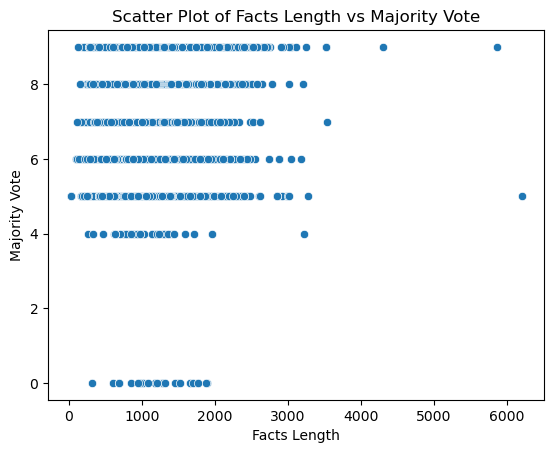

In [16]:
sns.scatterplot(data=df, x='facts_len', y='majority_vote')
plt.title('Scatter Plot of Facts Length vs Majority Vote')
plt.xlabel('Facts Length')
plt.ylabel('Majority Vote')
plt.show()

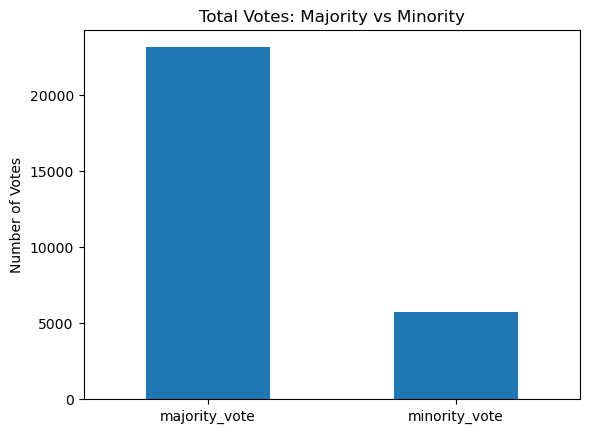

In [18]:
# توزيع الأصوات المؤيدة والمعارضة
votes = df[['majority_vote', 'minority_vote']].sum()
votes.plot(kind='bar', title='Total Votes: Majority vs Minority')
plt.ylabel('Number of Votes')
plt.xticks(rotation=0)
plt.show()

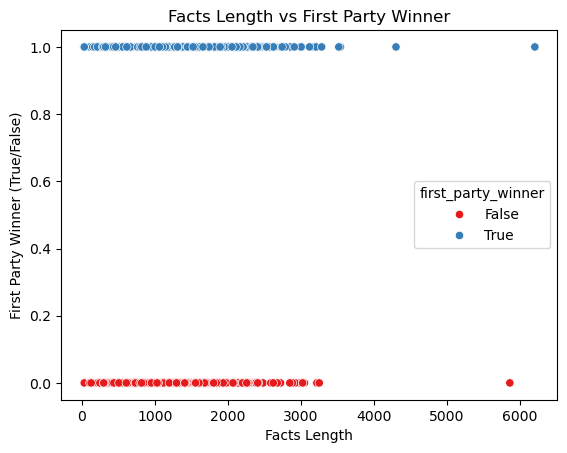

In [20]:
sns.scatterplot(data=df, x='facts_len', y='first_party_winner', hue='first_party_winner', palette='Set1')
plt.title('Facts Length vs First Party Winner')
plt.xlabel('Facts Length')
plt.ylabel('First Party Winner (True/False)')
plt.show()

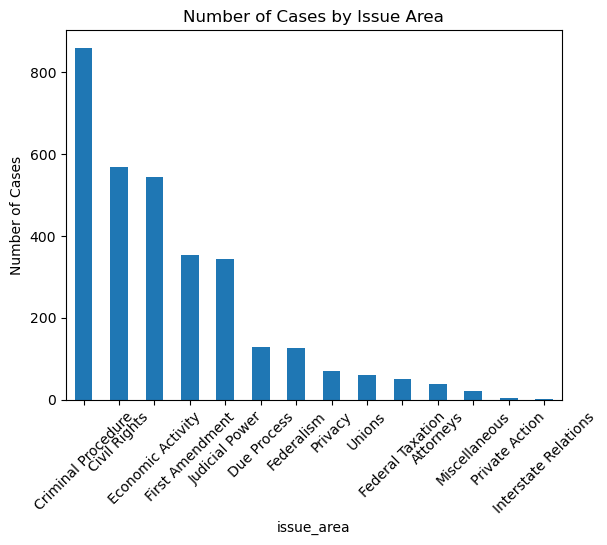

In [22]:
issue_counts = df['issue_area'].value_counts()
issue_counts.plot(kind='bar', title='Number of Cases by Issue Area')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

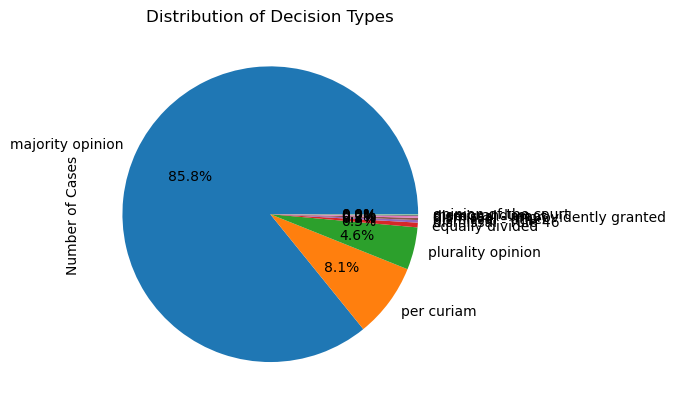

In [26]:
decision_counts = df['decision_type'].value_counts()
decision_counts.plot(kind='pie', autopct='%1.1f%%', title='Distribution of Decision Types')
plt.ylabel('Number of Cases')
plt.show()

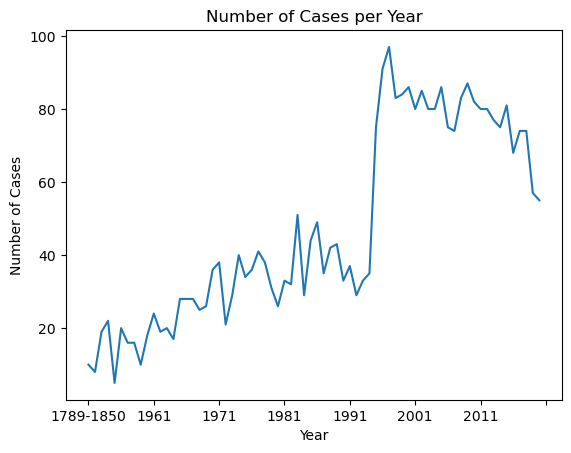

In [30]:
cases_per_year = df['term'].value_counts().sort_index()
cases_per_year.plot(kind='line', title='Number of Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.show()

D:\ANACONDA\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


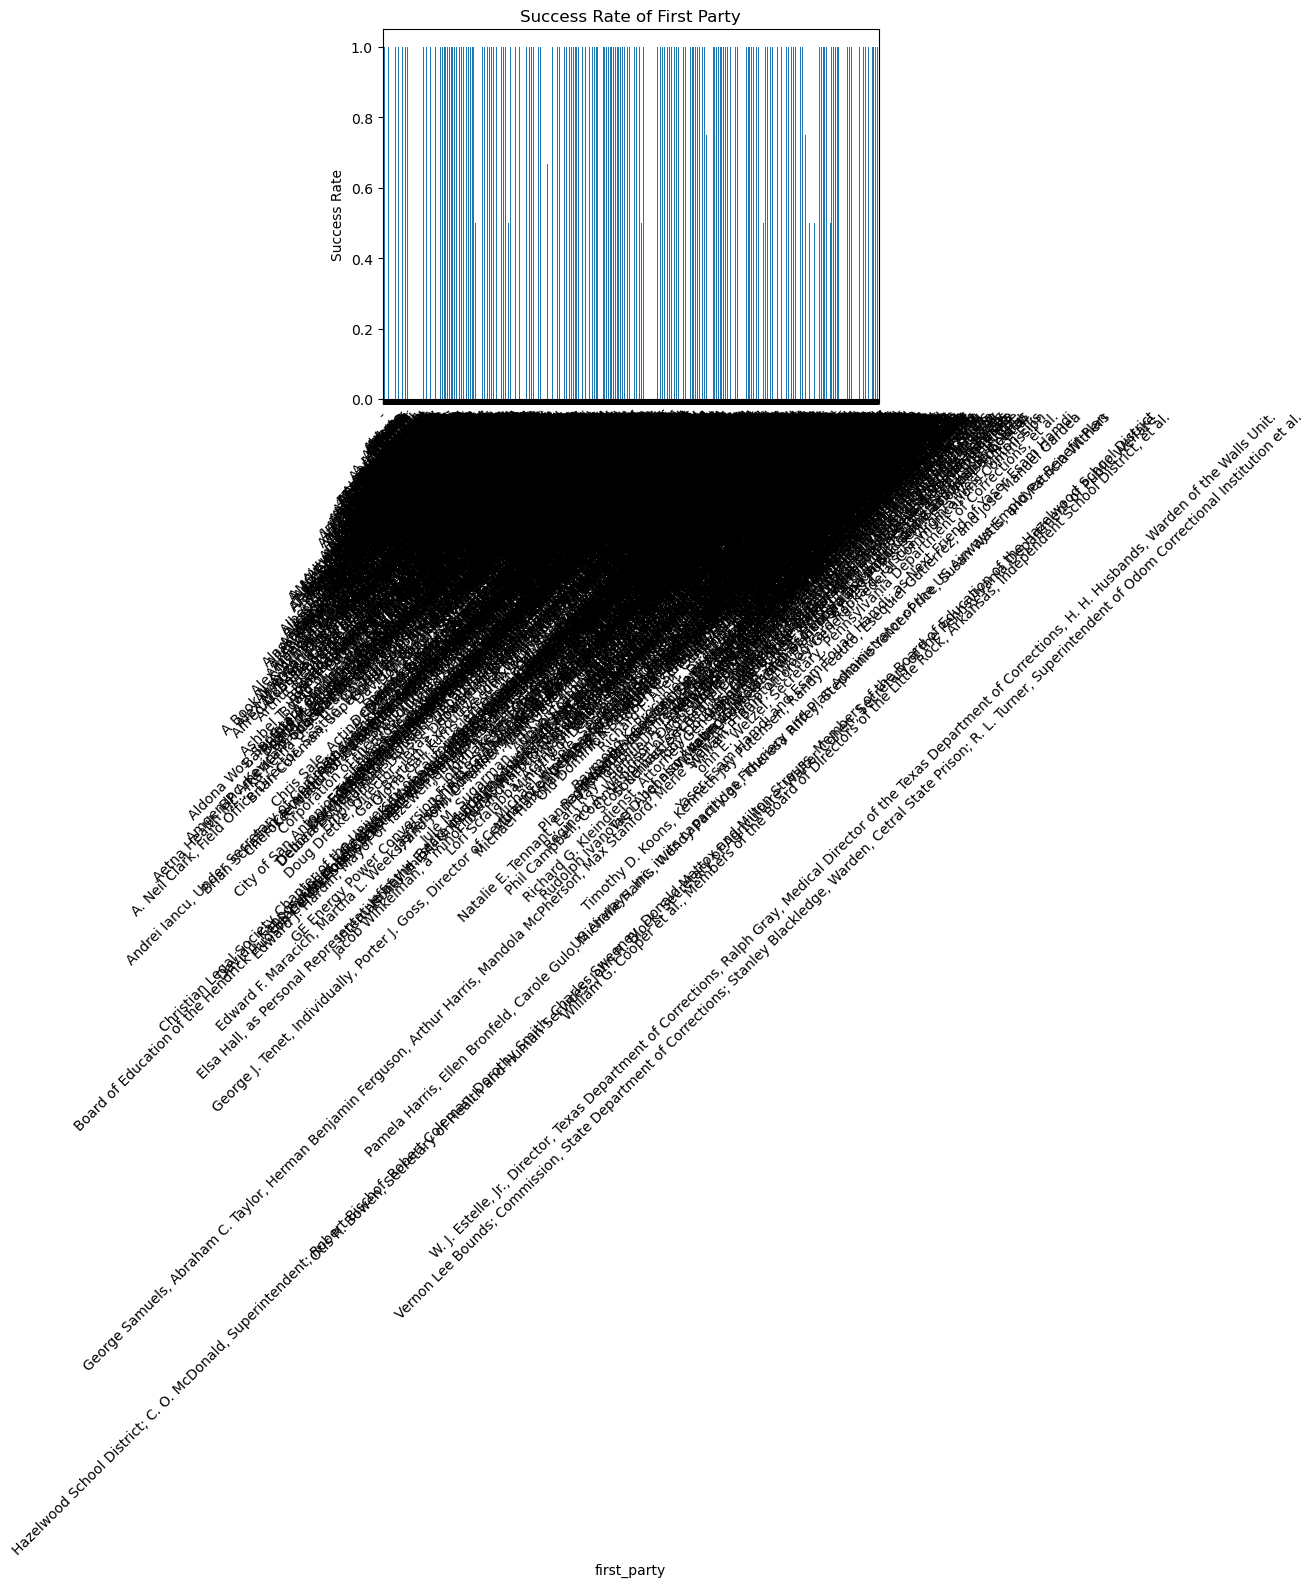

In [32]:
success_rate = df.groupby('first_party')['first_party_winner'].mean()
success_rate.plot(kind='bar', title='Success Rate of First Party')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.show()

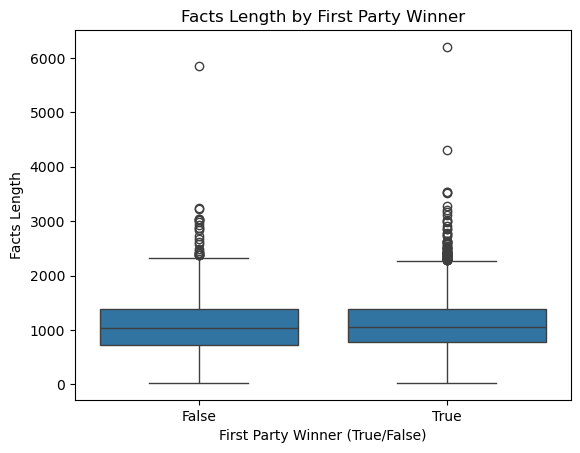

In [34]:
sns.boxplot(data=df, x='first_party_winner', y='facts_len')
plt.title('Facts Length by First Party Winner')
plt.xlabel('First Party Winner (True/False)')
plt.ylabel('Facts Length')
plt.show()

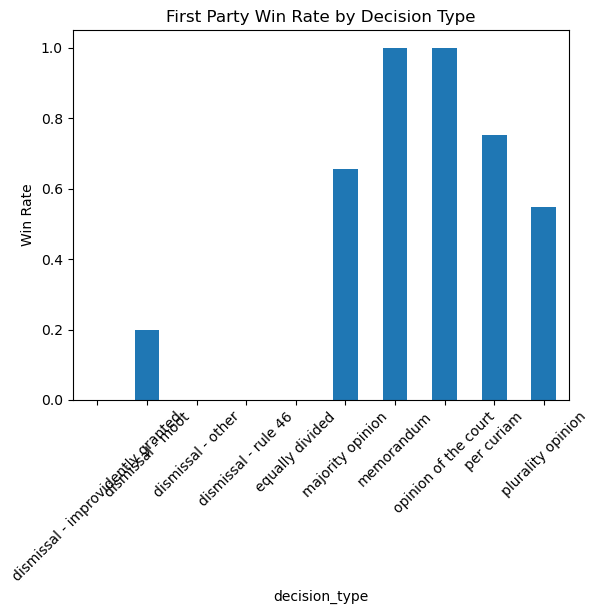

In [36]:
decision_outcomes = df.groupby('decision_type')['first_party_winner'].mean()
decision_outcomes.plot(kind='bar', title='First Party Win Rate by Decision Type')
plt.ylabel('Win Rate')
plt.xticks(rotation=45)
plt.show()

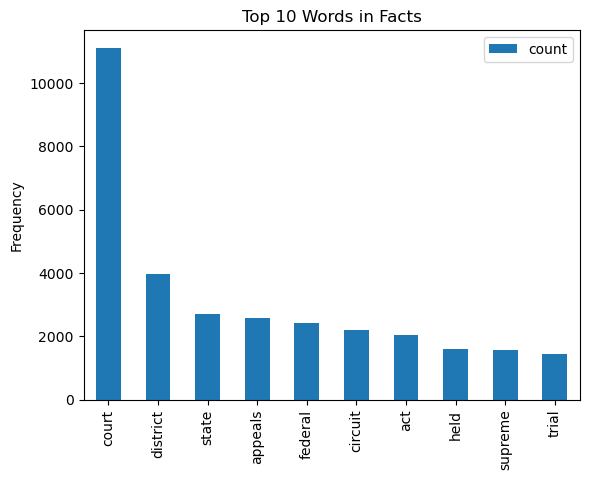

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['facts'].astype(str))
word_counts = X.sum(axis=0)
words = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame(word_counts, columns=words).T
word_freq.columns = ['count']
word_freq = word_freq.sort_values(by='count', ascending=False).head(10)

word_freq.plot(kind='bar', title='Top 10 Words in Facts')
plt.ylabel('Frequency')
plt.show()

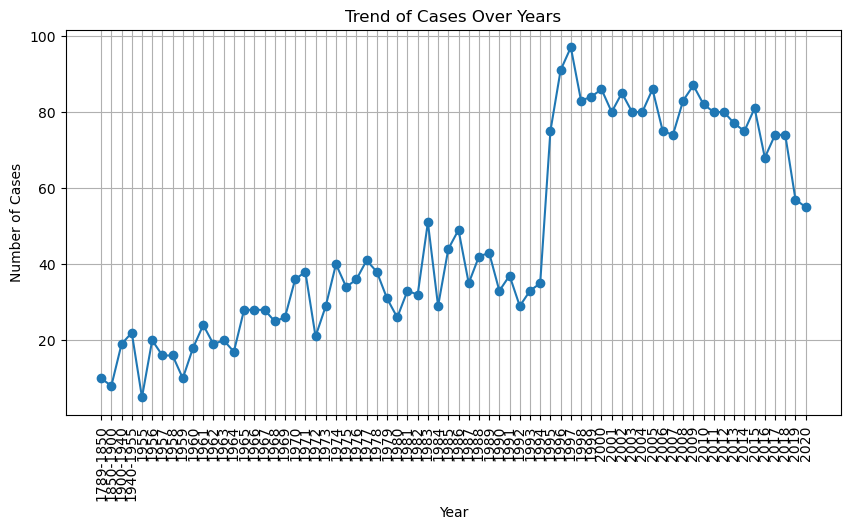

In [64]:
cases_per_year = df['term'].value_counts().sort_index()

# رسم الاتجاه الزمني
plt.figure(figsize=(10, 5))
plt.plot(cases_per_year.index, cases_per_year.values, marker='o')
plt.title('Trend of Cases Over Years')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Cases')
plt.grid()
plt.show()

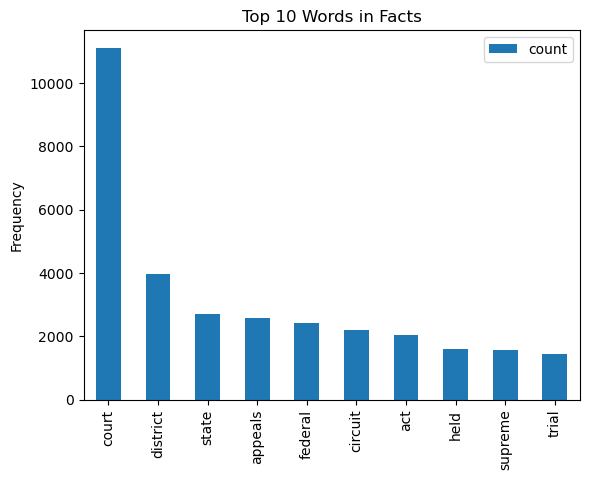

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

# استخراج الكلمات الأكثر شيوعًا
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['facts'].astype(str))
word_counts = X.sum(axis=0)
words = vectorizer.get_feature_names_out()
word_freq = pd.DataFrame(word_counts, columns=words).T
word_freq.columns = ['count']
word_freq = word_freq.sort_values(by='count', ascending=False).head(10)

# رسم الكلمات الأكثر شيوعًا
word_freq.plot(kind='bar', title='Top 10 Words in Facts')
plt.ylabel('Frequency')
plt.show()

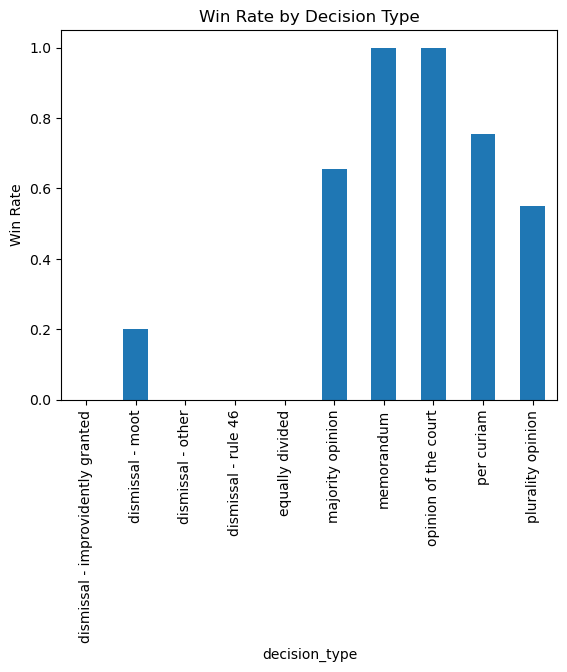

In [54]:
decision_outcomes = df.groupby('decision_type')['first_party_winner'].mean()
decision_outcomes.plot(kind='bar', title='Win Rate by Decision Type')
plt.ylabel('Win Rate')
plt.xticks(rotation=90)
plt.show()

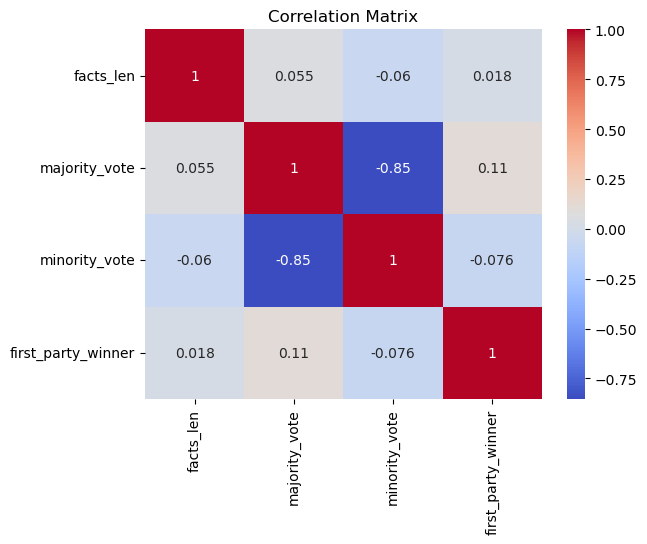

In [48]:
correlation_matrix = df[['facts_len', 'majority_vote', 'minority_vote', 'first_party_winner']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

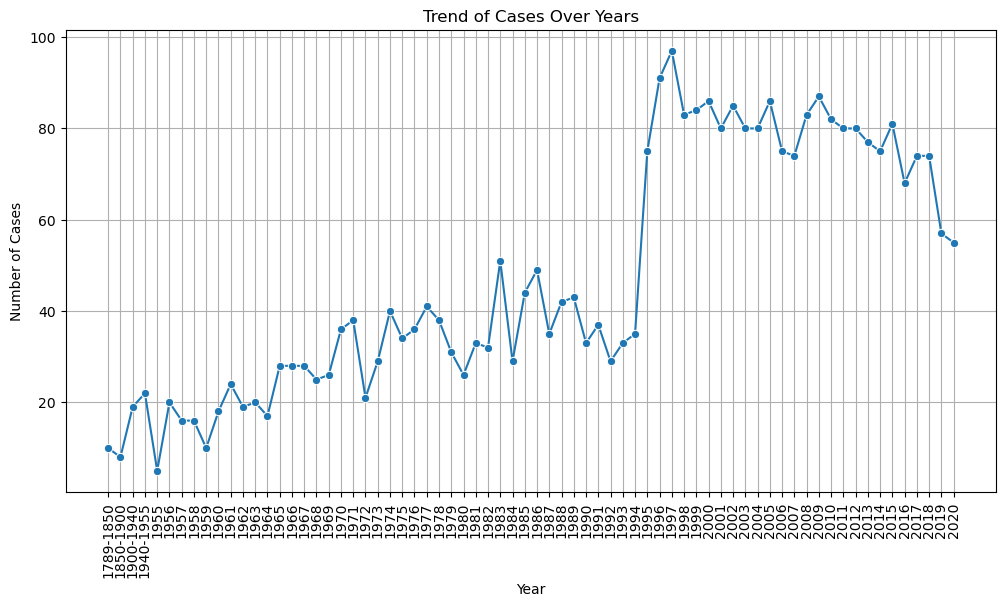

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# حساب عدد القضايا لكل سنة
cases_per_year = df['term'].value_counts().sort_index()

# رسم الاتجاه الزمني
plt.figure(figsize=(12, 6))
sns.lineplot(x=cases_per_year.index, y=cases_per_year.values, marker='o')
plt.title('Trend of Cases Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.grid()
plt.show()

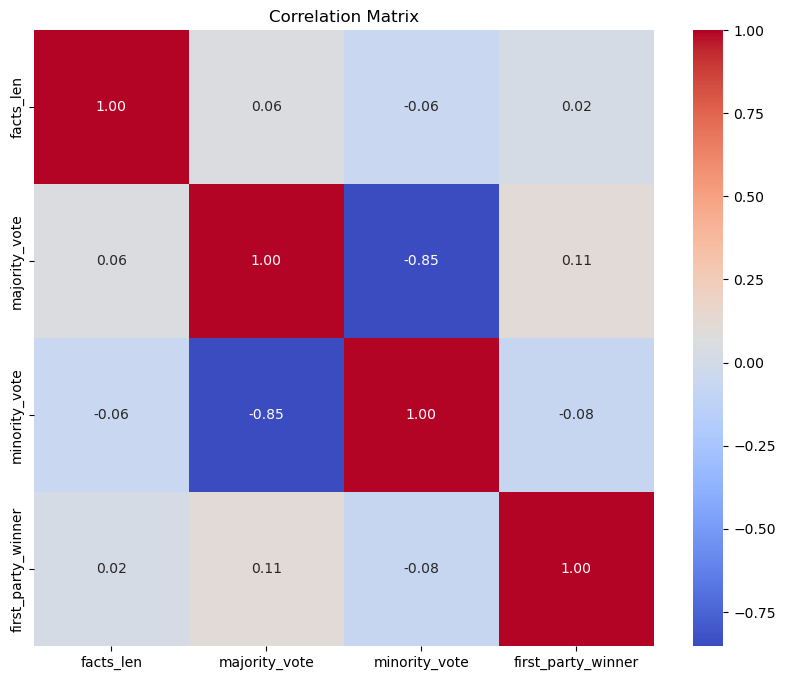

In [68]:
correlation_matrix = df[['facts_len', 'majority_vote', 'minority_vote', 'first_party_winner']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

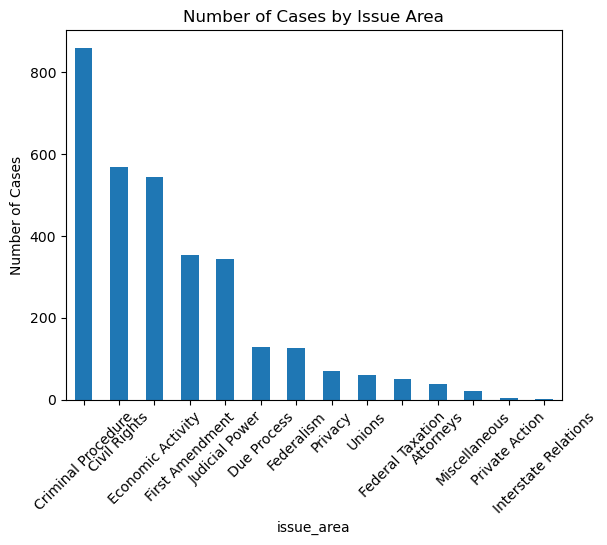

In [70]:
issue_counts = df['issue_area'].value_counts()
issue_counts.plot(kind='bar', title='Number of Cases by Issue Area')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()